# Case Study - GNOD

### Day 2 - build a function that inputs a song and outputs either another hot song or stops

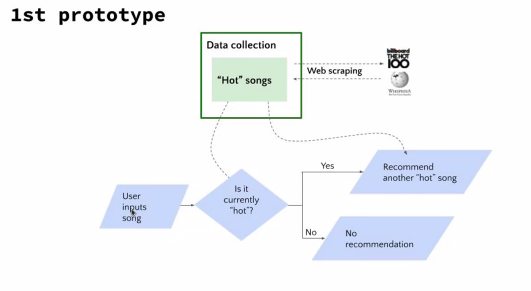

### Think about:
#### User experience 

What do we do, if there are errors with the input, e.g.:
- empty inputs (invalid input)
- typos (invalid input)
- gives a number (invalid input)
- song with the same name (title multiple time in database)
- song not in the list

#### Architecture

Where would we put the input into:
- where do we store the scraped songs? 
- preferibly in data folder

#### Data base refreshing
do we need to scrape all the time or which intervals do we do it:

- daily scrape, hourly, weekly?
- how to automate it

#### Logic

- what kind of recommendation?
- maybe always a different song from the database, no duplicates

#### Testing

- does the program work with a peer?

In [70]:
import pandas as pd

In [71]:
# importing the hot100 data file

hot100 = pd.read_csv('/Users/josephinebiedermann/Desktop/DABC2021/GitHub/ProjectsPhine/Week7/Week7Project/data/top_100_songs.csv')

In [72]:
# lookg at the data

hot100

# there is a unwanted column, we need to clean

,Unnamed: 0,title,artist,rank,performance
0,0,Rapstar,Polo G,1,Steady
1,1,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),2,Rising
2,2,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,3,Rising
3,3,Montero (Call Me By Your Name),Lil Nas X,4,Failing
4,4,Levitating,Dua Lipa Featuring DaBaby,5,Rising
...,...,...,...,...,...
95,95,Go!,Moneybagg Yo Featuring BIG30,96,New
96,96,Drankin N Smokin,Future & Lil Uzi Vert,97,Re-Enter
97,97,Monsters,All Time Low Featuring Demi Lovato & blackbear,98,Failing
98,98,Slatty,Young Thug & Gunna Featuring Yak Gotti & Lil Duke,99,New


In [194]:
# removing the unwanted column

hot100 = hot100.drop(['Unnamed: 0'], axis = 1)

In [75]:
# turning all values into lowercase to minimize the error possibilites for the input lateron

hot100['title'] = hot100['title'].str.lower()

In [195]:
# checking if the cleaning worked

hot100

# looks good

,title,artist,rank,performance
0,rapstar,Polo G,1,Steady
1,leave the door open,Silk Sonic (Bruno Mars & Anderson .Paak),2,Rising
2,peaches,Justin Bieber Featuring Daniel Caesar & Giveon,3,Rising
3,montero (call me by your name),Lil Nas X,4,Failing
4,levitating,Dua Lipa Featuring DaBaby,5,Rising
...,...,...,...,...
95,go!,Moneybagg Yo Featuring BIG30,96,New
96,drankin n smokin,Future & Lil Uzi Vert,97,Re-Enter
97,monsters,All Time Low Featuring Demi Lovato & blackbear,98,Failing
98,slatty,Young Thug & Gunna Featuring Yak Gotti & Lil Duke,99,New


In [127]:
# for the sake of building our function, we dont need the columns rank and performance

hot100_clean = hot100.drop(['rank', 'performance'], axis = 1)

In [77]:
# creating a list with all titles to iterate the song inputs over

hot100_lst = list(hot100['title'].unique())
hot100_lst

['rapstar',
 'leave the door open',
 'peaches',
 'montero (call me by your name)',
 'levitating',
 'save your tears',
 'astronaut in the ocean',
 'kiss me more',
 'up',
 'drivers license',
 'deja vu',
 'solid',
 'blinding lights',
 'beat box',
 'best friend',
 'calling my phone',
 'what you know bout love',
 'ski',
 'mood',
 'heartbreak anniversary',
 'the good ones',
 'beautiful mistakes',
 'back in blood',
 'go crazy',
 'you broke me first.',
 '34+35',
 "my ex's best friend",
 "what's next",
 'dakiti',
 'therefore i am',
 'without you',
 'on me',
 'positions',
 "you're mines still",
 'forever after all',
 'wants and needs',
 'track star',
 "we're good",
 'heat waves',
 'for the night',
 'hell of a view',
 'made for you',
 'no more parties',
 'good days',
 'starting over',
 'diamonds dancing',
 'goosebumps',
 'tombstone',
 "breaking up was easy in the 90's",
 'somebody like that',
 'streets',
 "what's your country song",
 'time today',
 'telepatia',
 'cry baby',
 'hold on',
 'street r

In [196]:
# creating a dict out of the df to match the recommendet song to the artist

dic = dict(zip(hot100_clean.title, hot100_clean.artist))

In [198]:
# build code that interacts with the user
# generate an input
    
song = input('Please name a song: ')

Please name a song: sladdy


In [199]:
# building a function for the recommendations of hop100

import random 

def recommendations(x):
    if song.lower() in hot100_lst:
        recommendation = random.choice(hot100_lst)
        print('Check out this song:',recommendation,'by', dic[recommendation])
    else:
        print('That is not a hot song. Sorry, we do not have a recommendation available!')

In [200]:
# testing the input and making the code more robust
# check for error possibilities: input not in list, input empty or whitespace, typo in input

invalid_inputs = [' ', '']

if song in hot100_lst:
    recommendations(song)
elif song in invalid_inputs:
    print('This is not a valid input. Please enter a song title.')
else:
    if difflib.get_close_matches(song, hot100_lst) == []:
        print('That is not a hot song. Sorry, we do not have a recommendation available!')
    else:
        print('Ups, something went wrong. Did you mean:', difflib.get_close_matches(song, hot100_lst), '? Please enter the correct title.')

Ups, something went wrong. Did you mean: ['lady', 'slatty'] ? Please enter the correct title.
